In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/unsegmented_algorithm_3.csv")

In [ ]:
dataset.head()

,Mean,Standard Deviation,Entropy,Root Mean Square,Variance,Smoothness,Kurtosis,Skewness,Contrast,Co-relation,Energy,Homogeneity,Disease
0,142.825600,68.316814,7.799914,158.323526,4667.187106,36.561905,-0.985061,-0.454958,68.316814,0.994779,22.013712,0.276280,NORMAL
1,129.788105,63.520867,7.784118,144.498626,4034.900600,24.656780,-0.902764,-0.308290,63.520867,0.985447,49.665704,0.281596,NORMAL
2,125.801144,66.486340,7.845627,142.289709,4420.433452,30.362963,-1.060783,-0.166092,66.486340,0.993520,28.207061,0.239024,NORMAL
3,156.515545,55.437192,7.653133,166.043362,3073.282282,28.851852,-0.588346,-0.600728,55.437192,0.987389,53.250484,0.286872,NORMAL
4,152.318817,60.454953,7.672014,163.877464,3654.801310,39.530864,-0.766938,-0.409500,60.454953,0.991307,49.426832,0.268511,NORMAL


In [ ]:
#The script below stores the feature sets into the X variable and the series of corresponding labels in to the y variable.

X = dataset.drop('Disease', 1)
y = dataset['Disease']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.48826490e-01 2.18386710e-01 1.78932688e-01 1.05767702e-01
 7.33592851e-02 2.65784352e-02 2.33840116e-02 1.47861836e-02
 9.43622964e-03 4.97874385e-04 4.43895421e-05 2.12948531e-34]


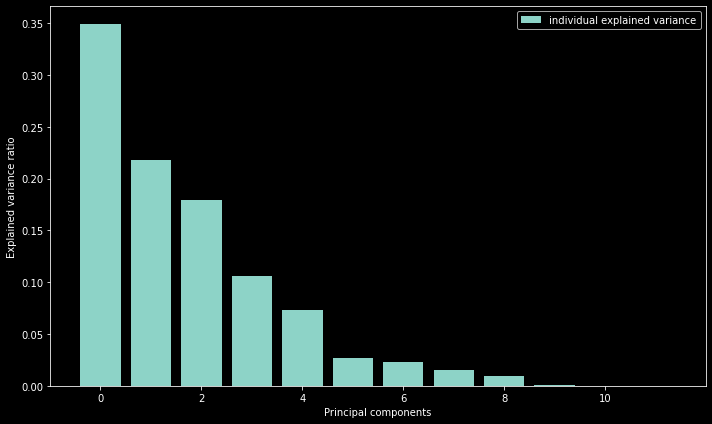

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(12), explained_variance, alpha=1, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
#Thus we can see from the above plot that first two components constitute most of the variance.Third,fourth and fifth components has good number of the data sprad.The last component has less than 5% of the variance.Hence we can drop the fifth component
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
import pickle

#saving the trained model
def saveModel(model,fileName):
  filename = fileName
  pickle.dump(model, open(filename, 'wb'))

#loading the trained model
def loadModel(modelName):
  with open(modelName , 'rb') as f:
      model = pickle.load(f)
      return model

###RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train.ravel())


RandomForestClassifier(random_state=10)

In [ ]:
saveModel(random_forest_model,"random_forest_model_pca.h5")

In [ ]:
random_forest_modelh5 = loadModel("random_forest_model_pca.h5")
predict_train_data = random_forest_modelh5.predict(X_test)
from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.939


###Decision Trees

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
saveModel(classifier,"decison_tree_classifier_pca.h5")

In [ ]:
classifier_model = loadModel("decison_tree_classifier_pca.h5")
y_pred= classifier_model.predict(X_test)  
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy = 0.880


###Logistic Regression

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
saveModel(classifier,"logistic_regression_pca.h5")

In [ ]:
#Predicting the test set result  
classifier_model_lr = loadModel("logistic_regression_pca.h5")
y_pred2= classifier_model_lr.predict(X_test)
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred2)))  

Accuracy = 0.870


###Support vector Machines

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
saveModel(classifier,"svm_pca.h5")

In [ ]:
#Predicting the test set result  
svm_model = loadModel("svm_pca.h5")
y_pred3= svm_model.predict(X_test)  
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred3)))

Accuracy = 0.870


In [ ]:
ensemble = loadModel("ensemble_pca.h5")

In [ ]:
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

y_pred2= ensemble.predict(X_test)
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred2)))  

Accuracy = 0.906
